In [23]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from datetime import timedelta

os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '.zipline')
os.listdir(os.environ['ZIPLINE_ROOT'])

os.environ['ZIPLINE_TRADER_CONFIG'] = os.path.join(os.getcwd(), "./alpaca.yaml")

with open(os.environ['ZIPLINE_TRADER_CONFIG'], 'r') as f:
    data = f.read()
    print(data[:20])
import zipline
from zipline.data import bundles

from zipline.utils.calendars import get_calendar
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.factors import CustomFactor
from zipline.research.utils import get_pricing, create_data_portal, create_pipeline_engine

# Set the trading calendar
trading_calendar = get_calendar('NYSE')
bundle_name = 'alpaca_api'
start_date = pd.Timestamp('2015-12-31', tz='utc')
pipeline_start_date = pd.Timestamp('2021-09-30', tz='utc')
end_date = pd.Timestamp('2021-12-23', tz='utc')
data_portal = create_data_portal(bundle_name, trading_calendar, start_date)


# root zipline-trade


In [24]:
engine = create_pipeline_engine(bundle_name)

In [25]:
from zipline.pipeline.factors import CustomFactor, Returns
from zipline.pipeline.data import USEquityPricing

class YearlyReturns(CustomFactor):
    inputs = [USEquityPricing.close]
    window_length = 252
    def compute(self, today, assets, out, prices):
        start = self.window_length
        out[:] = (prices[-1] - prices[-start])/prices[-start]

In [26]:
from zipline.pipeline.domain import US_EQUITIES
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline import Pipeline
from zipline.pipeline.classifiers.custom.sector import ZiplineTraderSector, SECTOR_LABELS

universe = USEquityPricing
universe = AverageDollarVolume(window_length = 5)

pipeline = Pipeline(
    columns = {
            'MyFactor' : YearlyReturns(),
#             'Returns': Returns(window_length=252),  # same as YearlyRetruns
            'Sector' : ZiplineTraderSector()
    }, domain=US_EQUITIES
)


In [27]:
# Run our pipeline for the given start and end dates
factors = engine.run_pipeline(pipeline, pipeline_start_date, end_date)

factors.head()



MyFactor  Sector
2021-09-30 00:00:00+00:00 Equity(0 [ABC])   0.263668       7
                          Equity(1 [ABMD])  0.187468       7
                          Equity(2 [ABT])   0.098254       7
                          Equity(3 [ACN])   0.432491       8
                          Equity(4 [ADM])   0.307593       3

In [28]:
asset_list = factors.index.levels[1].unique()

prices = get_pricing(
        data_portal,
        trading_calendar,
        asset_list,
        pipeline_start_date,
        end_date)
prices.head()

,Equity(0 [ABC]),Equity(1 [ABMD]),Equity(2 [ABT]),Equity(3 [ACN]),Equity(4 [ADM]),Equity(5 [AIG]),Equity(6 [AJG]),Equity(7 [AMAT]),Equity(8 [AMCR]),Equity(9 [AMT]),...,Equity(495 [T]),Equity(496 [TJX]),Equity(497 [TXN]),Equity(498 [TXT]),Equity(499 [VIAC]),Equity(500 [VTRS]),Equity(501 [WELL]),Equity(502 [WM]),Equity(503 [WRK]),Equity(504 [XRAY])
2021-10-01 00:00:00+00:00,119.83,323.23,117.24,324.90,60.83,55.51,152.48,129.10,11.70,266.53,...,27.170,66.63,193.78,71.04,39.91,13.60,83.840,149.89,50.93,59.05
2021-10-04 00:00:00+00:00,118.37,313.49,115.52,319.56,61.16,55.82,149.26,125.21,11.63,265.22,...,27.260,65.88,190.41,70.04,39.12,13.43,83.730,148.83,51.27,57.63
2021-10-05 00:00:00+00:00,118.67,332.28,115.87,325.12,62.27,57.45,151.82,128.07,11.80,264.56,...,27.340,65.10,193.87,70.59,39.57,13.50,81.745,149.88,51.64,57.57
2021-10-06 00:00:00+00:00,116.87,337.23,116.49,325.08,62.29,57.33,152.84,126.56,11.75,267.88,...,27.310,64.34,194.35,71.75,39.17,13.45,83.200,151.28,50.59,57.47
2021-10-07 00:00:00+00:00,118.58,340.57,117.91,326.24,63.05,57.22,153.44,127.91,11.84,266.09,...,27.085,64.98,195.34,73.29,39.85,13.64,82.930,154.00,50.92,58.01


In [29]:
import alphalens as al

In [30]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
        factor=factors["MyFactor"],
        prices=prices,
        quantiles=5,
        periods=[1, 5, 10],
        groupby=factors["Sector"],
        binning_by_group=True,
        groupby_labels=SECTOR_LABELS,
    max_loss=0.8)

Dropped 18.3% entries from factor data: 18.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 80.0%, not exceeded: OK!


In [31]:
factor_data.head(10)

1D        5D       10D  \
date                      asset                                            
2021-10-01 00:00:00+00:00 Equity(0 [ABC])  -0.012184 -0.003672  0.000250   
                          Equity(1 [ABMD]) -0.030133  0.043189  0.087152   
                          Equity(2 [ABT])  -0.014671  0.009894  0.002132   
                          Equity(3 [ACN])  -0.016436  0.001046  0.052047   
                          Equity(4 [ADM])   0.005425  0.040441  0.051126   
                          Equity(5 [AIG])   0.005585  0.038191  0.049901   
                          Equity(6 [AJG])  -0.021118  0.020921  0.068206   
                          Equity(7 [AMAT]) -0.030132 -0.022386  0.019287   
                          Equity(8 [AMCR]) -0.005983  0.000000  0.021368   
                          Equity(9 [AMT])  -0.004915 -0.016696  0.010243   

                                              factor                  group  \
date                      asset                                               
2021-10-01 00:00:00+00:00 Equity(0 [ABC])   0.252831            Health Care   
                          Equity(1 [ABMD])  0.251240            Health Care   
                          Equity(2 [ABT])   0.087261            Health Care   
                          Equity(3 [ACN])   0.419348          Miscellaneous   
                          Equity(4 [ADM])   0.287906  Consumer Non-Durables   
                          Equity(5 [AIG])   0.979445                Finance   
                          Equity(6 [AJG])   0.406969                Finance   
                          Equity(7 [AMAT])  1.123021             Technology   
                          Equity(8 [AMCR])  0.051724      Consumer Durables   
                          Equity(9 [AMT])   0.096454      Consumer Services   

                                            factor_quantile  
date                      asset                              
2021-10-01 00:00:00+00:00 Equity(0 [ABC])                 3  
                          Equity(1 [ABMD])                3  
                          Equity(2 [ABT])                 2  
                          Equity(3 [ACN])                 5  
                          Equity(4 [ADM])                 4  
                          Equity(5 [AIG])                 5  
                          Equity(6 [AJG])                 2  
                          Equity(7 [AMAT])                5  
                          Equity(8 [AMCR])                1  
                          Equity(9 [AMT])                 1

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.745204,0.750000,-0.040692,0.204938,5145,20.792079
2,-0.164259,1.205857,0.182949,0.177213,4900,19.801980
3,-0.095533,1.448993,0.320454,0.208385,4704,19.009901
4,0.036570,2.451861,0.469471,0.261408,4900,19.801980
5,0.170616,16.001621,0.952079,1.203169,5096,20.594059


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.084,-0.111,-0.160
beta,0.133,-0.012,0.038
Mean Period Wise Return Top Quantile (bps),0.654,-0.959,-2.142
Mean Period Wise Return Bottom Quantile (bps),-2.257,-0.138,1.826
Mean Period Wise Spread (bps),2.911,-0.859,-4.014


<Figure size 432x288 with 0 Axes>

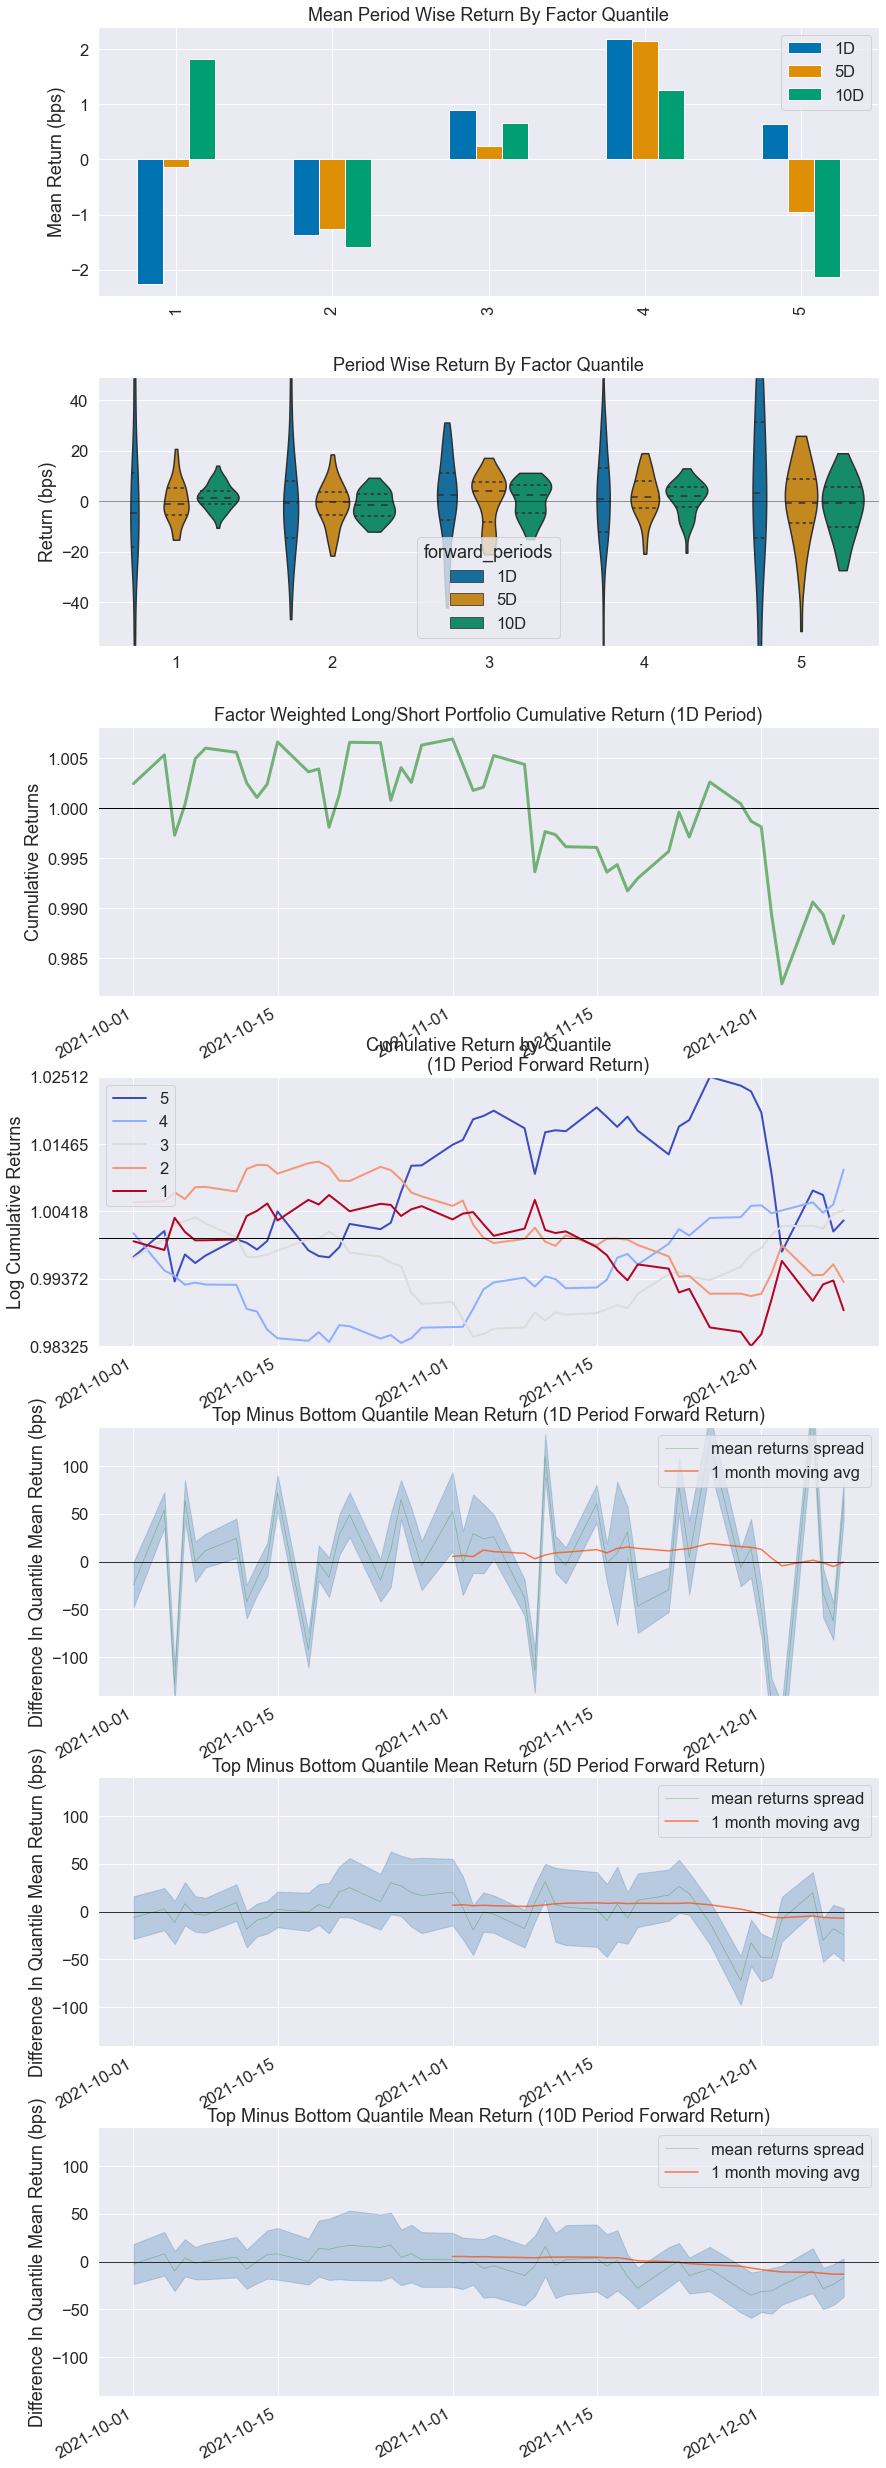

In [32]:
al.tears.create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)

In [ ]:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=True,
                                   group_neutral=False,
                                   by_group=False)

al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

al.tears.create_turnover_tear_sheet(factor_data)

al.tears.create_event_returns_tear_sheet(factor_data, prices,
                                         avgretplot=(5, 15),
                                         long_short=True,
                                         group_neutral=False,
                                         std_bar=True,
                                         by_group=False)
